In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

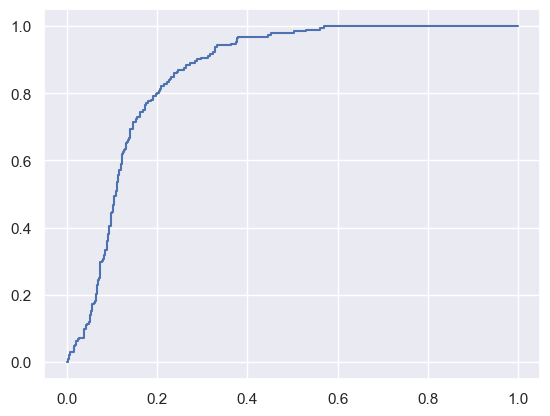

In [60]:
np.random.seed(2021)
true_defect_prob = 0.2

N = 1000
is_defective = np.random.random(N) < true_defect_prob

defective_yhats = np.random.beta(2.5, 1, N)
defective_yhats[defective_yhats > 1] = 1
defective_yhats[defective_yhats < 0] = 0

good_yhat_failure_prob = 0.1
detection_failures = np.random.random(N) < good_yhat_failure_prob
good_yhats = np.random.beta(1, 3, N) * (1-detection_failures) + np.random.beta(10, 1, N) * detection_failures
#plt.hist(good_yhats, bins=50);

yhat = good_yhats.copy()
yhat[is_defective] = defective_yhats[is_defective]

mfg = pd.DataFrame({'is_defective': is_defective, 'predicted_prob': yhat})
mfg.to_csv('manufacturing.csv', index=False)

fpr, tpr, threshs = roc_curve(is_defective, yhat)
plt.plot(fpr, tpr)